In [0]:
#### GEREKLİ KÜTÜPHANELERİ İMPORT ETTİK ####
##########################################
import numpy as np
import pyspark.pandas as ps
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
ps.set_option('compute.ops_on_diff_frames', True)
import seaborn as sns

In [0]:
##### VERİMİZİ OKUYALIM #####
###############################################
df = ps.read_csv("/FileStore/tables/orders.csv",inferSchema = "True")

In [0]:
df.head(15)

,ORDERID,USERID,DATE_,USER_BIRTHTDATE,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2
0,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,21075,HOBBY SAC KOPUGU 150 ML,21.500,KOZMETIK,SAC BAKIM
1,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,22390,SUTAS ESKI KASAR 350 GR,9.456,KAHVALTILIK,SUT-YOGURT-PEYNIR
2,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,8361,SOSERO KIRAZ BIBER PEY.DOLGULU 300 GR*12*,8.570,KAHVALTILIK,SUT-YOGURT-PEYNIR
3,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,19360,GEZER FLIP FLOP FILET KIZ GT5YFF.07297.00,16.700,EV,TEKSTIL-GIYIM-AKSESUAR
4,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,16062,OYUNCAK WOODOY PENTOMINO BULMACA,57.590,OYUNCAK,ZEKA GELISTIRICI
5,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,2060,ERNET KREM DET.500 ML LIMONLU *20*,2.880,DETERJAN,EV TEMIZLEYICILER
6,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,1317,TUTKU BAYAN BIKINI,2.320,EV,TEKSTIL-GIYIM-AKSESUAR
7,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,17831,DORT MEVSIM MAS/CILTLI/CO.GEZ.,5.760,EV,KITAP-DERGI-KIRTASIYE
8,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,11095,LUX SAB. APRICOT KAYISI OZU 90 GR*144*,1.710,KOZMETIK,DUS-BANYO
9,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,4898,"ERNET TEMIZLIK ICIN KARBONAT 1,5 KG*8*",16.140,DETERJAN,EV TEMIZLEYICILER


In [0]:
##### KAÇ ADET FARKLI ÜRÜNÜN OLDUĞUNA BAKMAK İSTEDİM (Merak ettim de :)####
############################################
df["ITEMNAME"].nunique()

Out[4]: 27478

In [0]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 529317 entries, 0 to 529316
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ORDERID          529317 non-null  int32         
 1   USERID           529317 non-null  int32         
 2   DATE_            529317 non-null  datetime64[ns]
 3   USER_BIRTHTDATE  529317 non-null  datetime64[ns]
 4   USERNAME         529317 non-null  object        
 5   CITY             529317 non-null  object        
 6   ITEM_ID          529317 non-null  int32         
 7   ITEMNAME         529317 non-null  object        
 8   ITEM_UNITPRICE   529317 non-null  float64       
 9   ITEM_CATEGORY1   529317 non-null  object        
 10  ITEM_CATEGORY2   529317 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(3), object(5)

In [0]:
##### İLLERE GÖRE EN FAZLA SATIŞ NERELERE YAPILMIŞ ONLARA BAKMAK İSTEDİM #####
############################
city_groupby_size = df.groupby("CITY").size()

In [0]:
city_groupby_size.sort_values(ascending = False).head(10)

Out[7]: CITY
?STANBUL    53701
?ZM?R       34589
ANKARA      22078
BURSA       19577
KONYA       18931
ADANA       17649
ANTALYA     17495
KOCAEL?     14438
MERS?N      13153
DEN?ZL?     13133
dtype: int64

Out[8]: (array([54., 14.,  6.,  4.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([  364. ,  5697.7, 11031.4, 16365.1, 21698.8, 27032.5, 32366.2,
        37699.9, 43033.6, 48367.3, 53701. ]),
 <BarContainer object of 10 artists>)

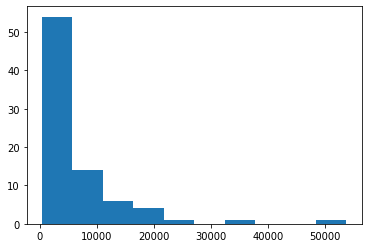

In [0]:
#### ALT TARAFTA 10000,20000 GİBİ SATIŞ SAYILARI VE BU SATIŞ SAYILARINI KAÇ FARKLI YERE YAPMIŞIZ GRAFİĞİNİ ÇİZDİRMEK İSTEDİM #####
###########################################
plt.hist(city_groupby_size)

In [0]:
##### TARİH YERİNDE SADECE GÜNLERİ ALIP YENİ BİR SÜTUN OLUŞTURMAK İSTEDİM GÜN BAZLI ANALİZLER YAPMAK İÇİN 
#################################3
date_day_df = ps.to_datetime(df['DATE_'], format='%Y/%M/%D').dt.strftime('%Y-%m-%d')

In [0]:
date_day_df.head()

Out[10]: 0    2021-03-25
1    2021-03-25
2    2021-03-25
3    2021-03-25
4    2021-03-25
Name: DATE_, dtype: object

In [0]:
df['Date_Day'] = date_day_df

In [0]:
#### BURADA DA GÖRÜLDÜĞÜ GİBİ YENİ BİR SÜTÜNUMUZ OLUŞMUŞ OLDU SADECE GÜNLER VAR 
df.head(15)

,ORDERID,USERID,DATE_,USER_BIRTHTDATE,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2,Date_Day
0,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,21075,HOBBY SAC KOPUGU 150 ML,21.500,KOZMETIK,SAC BAKIM,2021-03-25
1,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,22390,SUTAS ESKI KASAR 350 GR,9.456,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25
2,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,8361,SOSERO KIRAZ BIBER PEY.DOLGULU 300 GR*12*,8.570,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25
3,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,19360,GEZER FLIP FLOP FILET KIZ GT5YFF.07297.00,16.700,EV,TEKSTIL-GIYIM-AKSESUAR,2021-03-25
4,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,16062,OYUNCAK WOODOY PENTOMINO BULMACA,57.590,OYUNCAK,ZEKA GELISTIRICI,2021-03-25
5,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,2060,ERNET KREM DET.500 ML LIMONLU *20*,2.880,DETERJAN,EV TEMIZLEYICILER,2021-03-25
6,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,1317,TUTKU BAYAN BIKINI,2.320,EV,TEKSTIL-GIYIM-AKSESUAR,2021-03-25
7,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,17831,DORT MEVSIM MAS/CILTLI/CO.GEZ.,5.760,EV,KITAP-DERGI-KIRTASIYE,2021-03-25
8,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,11095,LUX SAB. APRICOT KAYISI OZU 90 GR*144*,1.710,KOZMETIK,DUS-BANYO,2021-03-25
9,80073,3906,2021-03-25 23:32:00,1960-02-17,Yusuf Ali BEKTA?ER,AMASYA,4898,"ERNET TEMIZLIK ICIN KARBONAT 1,5 KG*8*",16.140,DETERJAN,EV TEMIZLEYICILER,2021-03-25


In [0]:
#### EN ÇOK ÜRÜN HANGİ TARİHTE SATILMIŞ ONA BAKMAK İSTEDİM
###################
df.groupby("Date_Day").size().sort_values(ascending = False).head(10)

Out[13]: Date_Day
2021-02-28    2673
2020-01-28    1411
2020-05-08    1403
2020-03-21    1399
2020-02-18    1397
2021-03-18    1392
2021-03-08    1392
2020-12-22    1377
2020-04-07    1375
2020-11-02    1371
dtype: int64

In [0]:
###### YUKARIDA SADECE EN FAZLA SATIŞ YAPILAN GÜNÜ SEÇİP O GÜN HANGİ ÜRÜNLER SATILMIŞ , HANGİ KATEGORİDELER VE KAÇAR TANE SATILMIŞLAR ONLARI LİSTELEDİM
######################################################################
df[df["Date_Day"]=="2021-02-28"].groupby(["ITEMNAME","ITEM_CATEGORY1","ITEM_CATEGORY2"]).size().sort_values(ascending = False).head(15)

Out[14]: ITEMNAME                                        ITEM_CATEGORY1   ITEM_CATEGORY2       
KNORR 100 GR PANE HARCI *48*                    GIDA             TUZ-BAHARAT              3
RAMAZAN PAKETI NERGIS KRISTAL BEYAZ SEKER 2 KG  GIDA             BAKLIYAT-MAKARNA         3
PERSIL MAT.4 KG GOLD REGULAR *4*                DETERJAN         CAMASIR YIKAMA           3
ATATURK OLDU MU OLDURULDU MU                    EV               KITAP-DERGI-KIRTASIYE    3
BAY.SEK.ELIT BATON CIZGILI KG                   SEKERLEME        SAKIZ-SEKERLEME          3
BORA 0073 IKI KATLI TABAKLIK                    EV               MUTFAK GERECLERI         3
KOMILI SIVI SABUN 4 LT                          KOZMETIK         DUS-BANYO                2
OYUNCAK KT.DINAZORLU ISIKLI PIYANO              OYUNCAK          ZEKA GELISTIRICI         2
KOLESTON SIVI PEROKSIT %6                       KOZMETIK         SAC BAKIM                2
ELIF GIBI SEVMEK                                EV               KITAP-DERGI

In [0]:
###### BURADA DA İSTANBULA YAPILAN SATIŞLARDA EN FAZLA HANGİ ÜRÜNLER HANGİ KATEGORİDELER ONLARI GÖRMEK İSTEDİM
##################################################################
df[df["CITY"]=="?STANBUL"].groupby(["ITEMNAME","ITEM_CATEGORY1","ITEM_CATEGORY2"]).size().sort_values(ascending = False).head(15)

Out[15]: ITEMNAME                                 ITEM_CATEGORY1  ITEM_CATEGORY2        
MAGNUM FINELINER KALEM                   EV              KITAP-DERGI-KIRTASIYE     43
JIBER 156 ERKEK BOXER                    EV              TEKSTIL-GIYIM-AKSESUAR    23
SERVE BOLD 0,7 VERSATIL KALEM            EV              KITAP-DERGI-KIRTASIYE     21
MUZIKLI KALPLI PELUS AYI 37 CM           OYUNCAK         ZEKA GELISTIRICI          20
MAGNUM KALEM UCU 120LI                   EV              KITAP-DERGI-KIRTASIYE     19
TICON STICKIR                            EV              KITAP-DERGI-KIRTASIYE     18
MUZIKLI KALPLI PELUS AYI 58 CM           OYUNCAK         ZEKA GELISTIRICI          18
SERVE SWELL VERSATIL 07                  EV              KITAP-DERGI-KIRTASIYE     17
TIGRA OKUL DEFTERI SPIRALLI 6+2 240 YP   EV              KITAP-DERGI-KIRTASIYE     16
TICON FASHION RENKLI TUKENMEZ KALEM      EV              KITAP-DERGI-KIRTASIYE     15
PENSAN NEON GEL                          EV        

In [0]:
##### BURADA DA EN FAZLA SATIŞ YAPILAN TARİHTE İSTANBULA YAPILAN SATIŞLAR HANGİ ÜRÜNLER VE HANGİ KATEGORİDELER ONLARI LİSTELEMEK İSTEDİM
################################################################
df[(df["Date_Day"]=="2021-02-28")&(df["CITY"]=="?STANBUL")].groupby(["ITEMNAME","ITEM_CATEGORY1","ITEM_CATEGORY2"]).size().sort_values(ascending = False).head(15)

Out[16]: ITEMNAME                                   ITEM_CATEGORY1   ITEM_CATEGORY2        
DURACELL DUGME PIL 2016 2'LI 3 VOLT *100*  EV               ELEKTRIK-ELEKTRONIK       2
DANONE DANINO SEF.&KAYISI IC. 96X4*6*      SUT              DONDURMA-SUTLU TATLI      1
ULKER ICIM KAZANDIBI 150 GR *48*           SUT              DONDURMA-SUTLU TATLI      1
KIRTA.AKCAG TURKCE SOZLUK 1.KAD.           EV               KITAP-DERGI-KIRTASIYE     1
LIPTON-TB REZENE 20 LI 40 GR *12*          CAY-KAHVE-SEKER  GAZSIZ ICECEK             1
SIFALI BITKILER HAST. GORE BIT. TEDAV.     EV               KITAP-DERGI-KIRTASIYE     1
YUMURCAK MAX ARABA                         OYUNCAK          ZEKA GELISTIRICI          1
SOLAN HAYELLER                             EV               KITAP-DERGI-KIRTASIYE     1
KOZA TARCIN *36*                           SOGUK ICECEKLER  GAZSIZ ICECEK             1
GOLF BRAVO 100 ML GOLD BOL.CIK*15*         SUT              DONDURMA-SUTLU TATLI      1
OYUNCAK SURT. UV KIRILMAZ IT

In [0]:
### EN FAZLA SATIŞ YAPILAN TARİHTE EN FAZLA HANGİ İLLERE SATIŞ YAPILMIŞ ONLARI LİSTELEDİM
#####################################################
df[df["Date_Day"]=="2021-02-28"].groupby("CITY").size().sort_values(ascending = False).head(15)

Out[17]: CITY
?STANBUL          208
?ZM?R             175
ANKARA            163
BURSA              91
KONYA              90
MU?LA              87
DEN?ZL?            83
AFYONKARAH?SAR     79
MERS?N             72
KOCAEL?            72
TEK?RDA?           69
BALIKES?R          69
ADANA              64
MAN?SA             60
ANTALYA            55
dtype: int64

In [0]:
###### BURADA DA MÜŞTERİNİN DOĞUM TARİHİ VARDI BİÇİMSİZ GELMİŞTİ BUNU KALDIRIP 2022 YILINA GÖRE YAŞ HESAPLAYIP YENİ BİR SÜTÜN YAPMAK İSTEDİM
#####################################
birth_year_df = ps.to_datetime(df['USER_BIRTHTDATE'], format='%Y/%M/%D').dt.strftime('%Y')
#### ÖNCE DOĞUM YILLARINI ALMAM GEREKTİ ONLARI BİR SÜTUN YAPIP İŞLEME DEVAM ETTİM
#####################
df['birth_year'] = birth_year_df
df.head(5)

,ORDERID,USERID,DATE_,USER_BIRTHTDATE,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2,Date_Day,birth_year
0,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,21075,HOBBY SAC KOPUGU 150 ML,21.500,KOZMETIK,SAC BAKIM,2021-03-25,1973
1,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,22390,SUTAS ESKI KASAR 350 GR,9.456,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,1973
2,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,8361,SOSERO KIRAZ BIBER PEY.DOLGULU 300 GR*12*,8.570,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,1973
3,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,19360,GEZER FLIP FLOP FILET KIZ GT5YFF.07297.00,16.700,EV,TEKSTIL-GIYIM-AKSESUAR,2021-03-25,1973
4,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,16062,OYUNCAK WOODOY PENTOMINO BULMACA,57.590,OYUNCAK,ZEKA GELISTIRICI,2021-03-25,1977


In [0]:
##### BURADA MÜŞTERİLERİMİZİN YAŞLARINI BİR LİSTEYE ALIP AŞAĞIDA DA LİSTEYİ BİR SÜTUNA ÇEVİRECEĞİZ
###############################################
year=df["birth_year"]
year = year.to_numpy()
age_array = []
for value in year:
    result = 2022-int(value)
    age_array.append(result)

In [0]:
age_df = ps.DataFrame(data=age_array, columns=["age"])
age_series = age_df.squeeze()

In [0]:
df["age"] = age_series
df.head(6)
#########################
#### EVET YAŞ SÜTUNUMUZ OLUŞMUŞ OLDU DAHA GÜZEL VE ANLAŞILABİLİR OLDU :)

,ORDERID,USERID,DATE_,USER_BIRTHTDATE,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2,Date_Day,birth_year,age
0,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,21075,HOBBY SAC KOPUGU 150 ML,21.500,KOZMETIK,SAC BAKIM,2021-03-25,1973,49
5,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,2060,ERNET KREM DET.500 ML LIMONLU *20*,2.880,DETERJAN,EV TEMIZLEYICILER,2021-03-25,1977,45
1,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,22390,SUTAS ESKI KASAR 350 GR,9.456,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,1973,49
3,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,19360,GEZER FLIP FLOP FILET KIZ GT5YFF.07297.00,16.700,EV,TEKSTIL-GIYIM-AKSESUAR,2021-03-25,1973,49
2,74354,6156,2021-03-25 23:49:00,1973-07-30,?lhan UZUNDA?,ZONGULDAK,8361,SOSERO KIRAZ BIBER PEY.DOLGULU 300 GR*12*,8.570,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,1973,49
4,19550,6744,2021-03-25 23:43:00,1977-01-29,G�k�e YASA,ARTV?N,16062,OYUNCAK WOODOY PENTOMINO BULMACA,57.590,OYUNCAK,ZEKA GELISTIRICI,2021-03-25,1977,45


In [0]:
###### ARTIK BU SÜTUNLARLA İŞİMİZ KALMADI SİLEBİLİRİZ
######################################################
df = df.drop(['USER_BIRTHTDATE', 'birth_year'], axis=1 )

In [0]:
df.head(6)

,ORDERID,USERID,DATE_,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2,Date_Day,age
0,74354,6156,2021-03-25 23:49:00,?lhan UZUNDA?,ZONGULDAK,21075,HOBBY SAC KOPUGU 150 ML,21.500,KOZMETIK,SAC BAKIM,2021-03-25,49
5,19550,6744,2021-03-25 23:43:00,G�k�e YASA,ARTV?N,2060,ERNET KREM DET.500 ML LIMONLU *20*,2.880,DETERJAN,EV TEMIZLEYICILER,2021-03-25,45
1,74354,6156,2021-03-25 23:49:00,?lhan UZUNDA?,ZONGULDAK,22390,SUTAS ESKI KASAR 350 GR,9.456,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,49
3,74354,6156,2021-03-25 23:49:00,?lhan UZUNDA?,ZONGULDAK,19360,GEZER FLIP FLOP FILET KIZ GT5YFF.07297.00,16.700,EV,TEKSTIL-GIYIM-AKSESUAR,2021-03-25,49
2,74354,6156,2021-03-25 23:49:00,?lhan UZUNDA?,ZONGULDAK,8361,SOSERO KIRAZ BIBER PEY.DOLGULU 300 GR*12*,8.570,KAHVALTILIK,SUT-YOGURT-PEYNIR,2021-03-25,49
4,19550,6744,2021-03-25 23:43:00,G�k�e YASA,ARTV?N,16062,OYUNCAK WOODOY PENTOMINO BULMACA,57.590,OYUNCAK,ZEKA GELISTIRICI,2021-03-25,45


In [0]:
###### BURADA DA MÜŞTERİLİMİZDEN YAŞLARA GÖRE SAYILARI SATIŞLARI LİSTELEDİK
##########################
##### 71 YAŞINDAKİ DEDELERİN BU KADAR SİPARİŞ VERMİŞ OLMASI GÜZEL :)
#######
df.groupby("age").size().sort_values(ascending = False).head(15)

Out[24]: age
71    10725
57    10247
58    10191
76     9980
80     9898
55     9857
26     9701
75     9680
35     9649
72     9643
66     9577
47     9518
44     9502
33     9428
41     9427
dtype: int64

In [0]:
###### BURADA DA EN ÇOK PARA HARCAYAN MÜŞTERİLERİN ID VE ŞEHİR BİLGİLERİNE GÖRE TOPLAM HARCAMA TUTARLARI
####################################################################
df.groupby(["USERID","CITY"])["ITEM_UNITPRICE"].sum().sort_values(ascending = False).head(15)

Out[25]: USERID  CITY         
5858    ESK??EH?R        3169.3940
9290    MAN?SA           2500.1400
2710    ?ZM?R            2424.6320
5740    KOCAEL?          2370.3100
6768    ?STANBUL         2338.3024
3622    MAN?SA           2308.4208
5823    ISPARTA          2275.5300
4714    S?VAS            2262.0380
7126    S??RT            2212.6800
2348    MU?LA            2160.6020
159     ?STANBUL         2064.5620
2819    �ANAKKALE        2041.8040
1691    ?ANLIURFA        2041.7440
3801    KAHRAMANMARA?    2025.7240
3170    ?STANBUL         1986.8200
Name: ITEM_UNITPRICE, dtype: float64

In [0]:
##### BURADA DA EN ÇOK PARA HARCAYAN MÜŞTERİNİN ALDIKLARI ÜRÜNLERDEN 4 TANESİNİ LİSTELEDİM
###############################
df[df["USERID"]==5858].head(4)

,ORDERID,USERID,DATE_,USERNAME,CITY,ITEM_ID,ITEMNAME,ITEM_UNITPRICE,ITEM_CATEGORY1,ITEM_CATEGORY2,Date_Day,age
175156,38106,5858,2020-10-29 01:16:00,Tar?k ATE?L?ER,ESK??EH?R,8766,M?KRO MP823 VERSAT?L KALEM,1.52,EV,KITAP-DERGI-KIRTASIYE,2020-10-29,45
175157,38106,5858,2020-10-29 01:16:00,Tar?k ATE?L?ER,ESK??EH?R,23539,GUNES KIZ COCUK ATLET NO5,1.44,BEBEK,TEKSTIL-GIYIM-AKSESUAR,2020-10-29,45
222110,40375,5858,2020-09-19 19:14:00,Tar?k ATE?L?ER,ESK??EH?R,7010,IPANA D.MAC. 75 ML.CAY KAHVE *12*,22.32,KOZMETIK,AGIZ BAKIM,2020-09-19,45
374502,88671,5858,2020-05-12 20:59:00,Tar?k ATE?L?ER,ESK??EH?R,5578,GEZER 9658.00 ZENNE(MARKET)*12*,15.59,EV,TEKSTIL-GIYIM-AKSESUAR,2020-05-12,45


In [0]:
#####BURADA DA ŞÖYLE BİR ŞEY YAPMAK İSTEDİM YENİ BİR ÜRÜN GETİRDİĞİMİZİ VARSAYALIM DÜKKANIMIZA VE BU ÜRNÜN HANGİ TARİHLERDE , HANGİ İLLERE VE KAÇ YAŞINDAKİ MÜŞTERİLERE SATMIŞIZ DİYE DÜŞÜNÜP UYGULADIM
#################################################################################
####### ÜRÜNÜ RASTGELE SEÇİP BAKTIM #########
new_urun_df = df[df["ITEMNAME"]=="MUZIKLI KALPLI PELUS AYI 58 CM"]

In [0]:
##### HANGİ TARİHLERDE HANGİ YAŞTAKİ İNSANLARA SATILDIĞINI GÖSTEREN LİSTENİN 20 SATIRINI GÖSTERDİM
##########################################################
ps.DataFrame(new_urun_df.groupby(["CITY","Date_Day","age"]).size()).head(20)

,,,0
CITY,Date_Day,age,
TOKAT,2021-03-03,60,1
AYDIN,2021-03-13,42,1
?STANBUL,2021-02-22,46,1
KAHRAMANMARA?,2021-03-02,39,1
�ANAKKALE,2021-03-13,54,1
KIRIKKALE,2021-01-29,61,1
ANKARA,2021-02-03,54,1
SAMSUN,2021-03-05,35,1
NEV?EH?R,2021-03-18,48,1


In [0]:
####### SON OLARAK DA GÜNLÜK BAZDA TOPLAM CİROMUZU GÖRMEK İSTEDİM
df.groupby("Date_Day")["ITEM_UNITPRICE"].sum().sort_values(ascending = False).head(15)

Out[29]: Date_Day
2021-02-28    33298.290920
2020-02-16    20550.896200
2020-04-25    18725.073200
2021-02-04    18650.530000
2020-03-21    18482.738000
2020-05-12    18400.510360
2020-08-18    18179.186520
2021-03-08    18154.887600
2021-01-14    18046.231600
2020-02-01    18007.138468
2020-01-28    18006.874008
2020-11-27    17933.795600
2020-02-23    17869.383011
2020-02-05    17868.519200
2020-04-07    17863.184850
Name: ITEM_UNITPRICE, dtype: float64

In [0]:
############# TEŞEKKÜRLER ######################## TEŞEKKÜRLER ##################### TEŞEKKÜRLER ######################### TEŞEKKÜRLER ###################### TEŞEKKÜRLER ##################